In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime, timedelta
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

## Data

In [8]:
financial = pd.read_csv('data/train_files/financials.csv')

In [9]:
financial.head(2)

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0


In [10]:
# 2761
financial.query('SecuritiesCode == 2761').tail()

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
69236,2.020093e+13,20201002_2761,2020-10-02,2761.0,2020-10-02,11:00:00,1.601604e+09,1QFinancialStatements_Consolidated_JP,2020-08-20,1Q,...,211.22,NaN,False,False,False,False,False,11405400.0,3451825,7953575
74109,2.020113e+13,20201228_2761,2020-12-28,2761.0,2020-12-28,11:00:00,1.609121e+09,2QFinancialStatements_Consolidated_JP,2020-11-20,2Q,...,211.22,NaN,False,False,False,False,False,11405400.0,3453425,7953018
79003,2.021031e+13,20210331_2761,2021-03-31,2761.0,2021-03-31,11:00:00,1.617156e+09,3QFinancialStatements_Consolidated_JP,2021-02-20,3Q,...,211.22,NaN,False,False,False,False,False,11405400.0,3453425,7952673
84011,2.021062e+13,20210702_2761,2021-07-02,2761.0,2021-07-02,11:00:00,1.625191e+09,FYFinancialStatements_Consolidated_JP,2021-05-20,FY,...,193.72,NaN,False,False,False,False,False,11405400.0,3453425,7952501.0
88535,2.021092e+13,20211001_2761,2021-10-01,2761.0,2021-10-01,11:00:00,1.633054e+09,1QFinancialStatements_Consolidated_JP,2021-08-20,1Q,...,193.72,NaN,False,True,False,False,False,11405400.0,3457125,7950035.0


In [11]:
financial.columns

Index(['DisclosureNumber', 'DateCode', 'Date', 'SecuritiesCode',
       'DisclosedDate', 'DisclosedTime', 'DisclosedUnixTime', 'TypeOfDocument',
       'CurrentPeriodEndDate', 'TypeOfCurrentPeriod',
       'CurrentFiscalYearStartDate', 'CurrentFiscalYearEndDate', 'NetSales',
       'OperatingProfit', 'OrdinaryProfit', 'Profit', 'EarningsPerShare',
       'TotalAssets', 'Equity', 'EquityToAssetRatio', 'BookValuePerShare',
       'ResultDividendPerShare1stQuarter', 'ResultDividendPerShare2ndQuarter',
       'ResultDividendPerShare3rdQuarter',
       'ResultDividendPerShareFiscalYearEnd', 'ResultDividendPerShareAnnual',
       'ForecastDividendPerShare1stQuarter',
       'ForecastDividendPerShare2ndQuarter',
       'ForecastDividendPerShare3rdQuarter',
       'ForecastDividendPerShareFiscalYearEnd',
       'ForecastDividendPerShareAnnual', 'ForecastNetSales',
       'ForecastOperatingProfit', 'ForecastOrdinaryProfit', 'ForecastProfit',
       'ForecastEarningsPerShare',
       'ApplyingOf

In [12]:
options = pd.read_csv('data/train_files/options.csv')

In [13]:
options.head(5)

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20170104_132010018,2017-01-04,132010018,650.0,650.0,480.0,480.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,480.0,478.4587,17.4736,17.5865,0.0091,0.0,0.0
1,20170104_132010118,2017-01-04,132010118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,575.0,571.1385,17.4736,16.5000,0.0091,0.0,0.0
2,20170104_132010218,2017-01-04,132010218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,680.0,677.3710,17.4736,15.8644,0.0091,0.0,0.0
3,20170104_132010318,2017-01-04,132010318,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,795.0,791.0383,17.4736,15.2288,0.0091,0.0,0.0
4,20170104_132010518,2017-01-04,132010518,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,910.0,909.9947,17.4736,14.5932,0.0091,0.0,0.0


In [14]:
options.columns

Index(['DateCode', 'Date', 'OptionsCode', 'WholeDayOpen', 'WholeDayHigh',
       'WholeDayLow', 'WholeDayClose', 'NightSessionOpen', 'NightSessionHigh',
       'NightSessionLow', 'NightSessionClose', 'DaySessionOpen',
       'DaySessionHigh', 'DaySessionLow', 'DaySessionClose', 'TradingVolume',
       'OpenInterest', 'TradingValue', 'ContractMonth', 'StrikePrice',
       'WholeDayVolume', 'Putcall', 'LastTradingDay', 'SpecialQuotationDay',
       'SettlementPrice', 'TheoreticalPrice', 'BaseVolatility',
       'ImpliedVolatility', 'InterestRate', 'DividendRate', 'Dividend'],
      dtype='object')

## Price

In [15]:
prices = pd.read_csv('data/train_files/stock_prices.csv', parse_dates=[1])
prices.shape

(2332531, 12)

In [16]:
prices.head(2)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324


### - date

In [17]:
date = prices.Date
date_desc = date.describe(datetime_is_numeric=True)
date_min = date_desc.loc['min']
date_max = date_desc.loc['max']
print('Data from {:%Y-%m-%d} to {:%Y-%m-%d}'
        .format(date_min, date_max))
print('Data observations {} '.format(
                 date.nunique()))

Data from 2017-01-04 to 2021-12-03
Data observations 1202 


from https://www.timeanddate.com/date/workdays.html?d1=4&m1=1&y1=2017&d2=3&m2=12&y2=2021&ti=on&

1211 days 

1795 calendar days – 584 days skipped:
Excluded 256 Saturdays
Excluded 256 Sundays
Excluded 72 holidays

excluded 2010-10-1 because system failer in jpx

remain 1210 days  and 8 left
- Which one are missing and why?

1202 == 1794 . we miss data, where?
- find missing data

- generate working days

In [18]:
t = np.arange(date_min, date_max, timedelta(days=1)).astype(datetime)

#t_work = [day for day in t if asia.Japan().is_working_day(day)]

In [19]:
date_df = pd.DataFrame(date)
#time_df = pd.to_datetime(t_work)

In [20]:
type(pd.Timestamp(date.unique()[0]))

pandas._libs.tslibs.timestamps.Timestamp

transactions pro date

In [21]:
date.nunique()

1202

- observations

In [22]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   RowId             object        
 1   Date              datetime64[ns]
 2   SecuritiesCode    int64         
 3   Open              float64       
 4   High              float64       
 5   Low               float64       
 6   Close             float64       
 7   Volume            int64         
 8   AdjustmentFactor  float64       
 9   ExpectedDividend  float64       
 10  SupervisionFlag   bool          
 11  Target            float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 198.0+ MB


In [23]:
prices.head(2)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324


In [24]:
prices.tail(2)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098
2332530,20211203_9997,2021-12-03,9997,690.0,711.0,686.0,696.0,381100,1.0,NaN,False,0.018414


- amount of trades each day

<AxesSubplot:xlabel='index', ylabel='Date'>

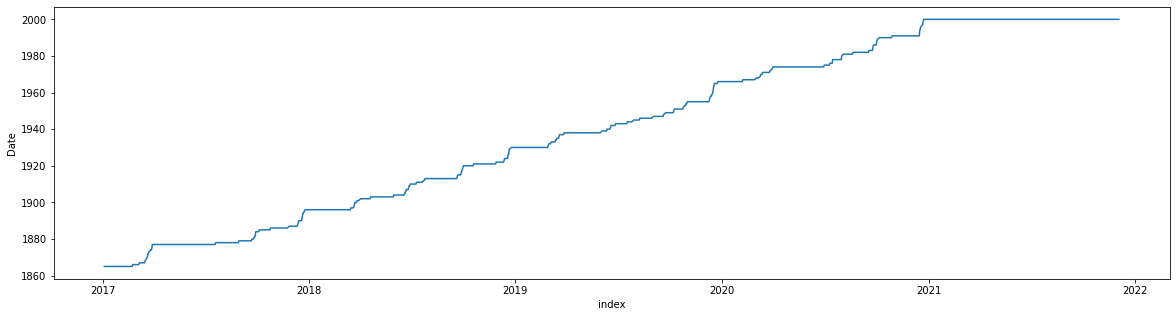

In [25]:
count = pd.DataFrame(prices.Date.value_counts().reset_index())
count.head()
plt.figure(figsize = (20,5))
sns.lineplot(data = count, x= 'index', y ='Date')


In [26]:
count.tail()

,index,Date
1197,2017-02-08,1865
1198,2017-02-07,1865
1199,2017-02-06,1865
1200,2017-02-03,1865
1201,2017-01-04,1865


days with nan = 2021-12-03

In [27]:
a = prices[(prices['Date']=='2021-12-03')]
a.count()

RowId               2000
Date                2000
SecuritiesCode      2000
Open                1995
High                1995
Low                 1995
Close               1995
Volume              2000
AdjustmentFactor    2000
ExpectedDividend       0
SupervisionFlag     2000
Target              2000
dtype: int64

In [28]:
a.query('Open != Open')

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
2330563,20211203_1787,2021-12-03,1787,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.030351
2330786,20211203_2761,2021-12-03,2761,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
2331453,20211203_5918,2021-12-03,5918,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.015625
2332336,20211203_9083,2021-12-03,9083,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.009615
2332462,20211203_9733,2021-12-03,9733,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000


a day before

In [29]:
b = prices[(prices['Date']=='2021-12-02')]
b.query('Open != Open')

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
2328632,20211202_1981,2021-12-02,1981,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
2328786,20211202_2761,2021-12-02,2761,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.015714
2328823,20211202_2923,2021-12-02,2923,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.004274
2330462,20211202_9733,2021-12-02,9733,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000


and before

In [30]:
c = prices[(prices['Date']=='2021-12-01')]
c.query('Open != Open')

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
2326786,20211201_2761,2021-12-01,2761,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
2326804,20211201_2814,2021-12-01,2814,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.010481
2327247,20211201_4628,2021-12-01,4628,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.011984
2328419,20211201_9539,2021-12-01,9539,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.005917
2328462,20211201_9733,2021-12-01,9733,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000


In [31]:
d = prices[(prices['Date']=='2021-12-01')]
c.query('Open != Open')

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
2326786,20211201_2761,2021-12-01,2761,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
2326804,20211201_2814,2021-12-01,2814,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.010481
2327247,20211201_4628,2021-12-01,4628,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.011984
2328419,20211201_9539,2021-12-01,9539,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.005917
2328462,20211201_9733,2021-12-01,9733,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000


<AxesSubplot:xlabel='Date', ylabel='Open'>

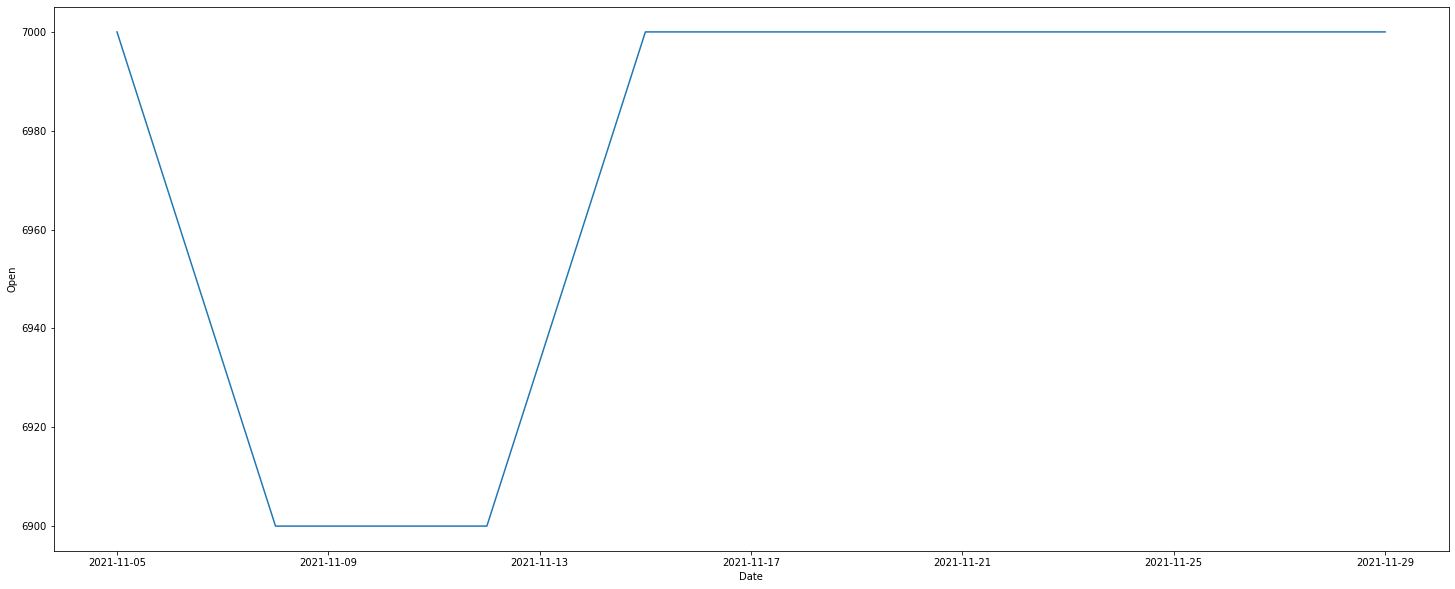

In [32]:

plt.figure(figsize=(25,10))
sns.lineplot(data = prices.query('SecuritiesCode == 2761 and Date > "2021-11-01"' ), x='Date', y= 'Open')

#sns.lineplot(data = prices.query('SecuritiesCode == 9994 and Date > "2021-11-01"' ), x='Date', y= 'Open')

<AxesSubplot:xlabel='Date', ylabel='Open'>

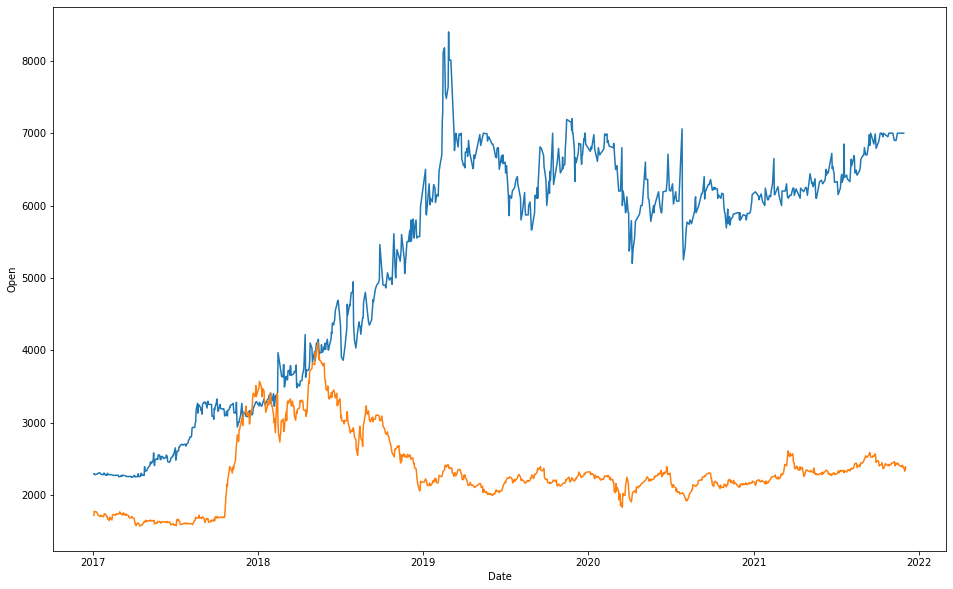

In [33]:
plt.figure(figsize=(16,10))
sns.lineplot(data = prices.query('SecuritiesCode == 2761'), x='Date', y= 'Open')
sns.lineplot(data = prices.query('SecuritiesCode == 9994'), x='Date', y= 'Open')


In [34]:
prices.isnull().sum().sort_values(ascending=False)

ExpectedDividend    2313666
Open                   7608
High                   7608
Low                    7608
Close                  7608
Target                  238
RowId                     0
Date                      0
SecuritiesCode            0
Volume                    0
AdjustmentFactor          0
SupervisionFlag           0
dtype: int64

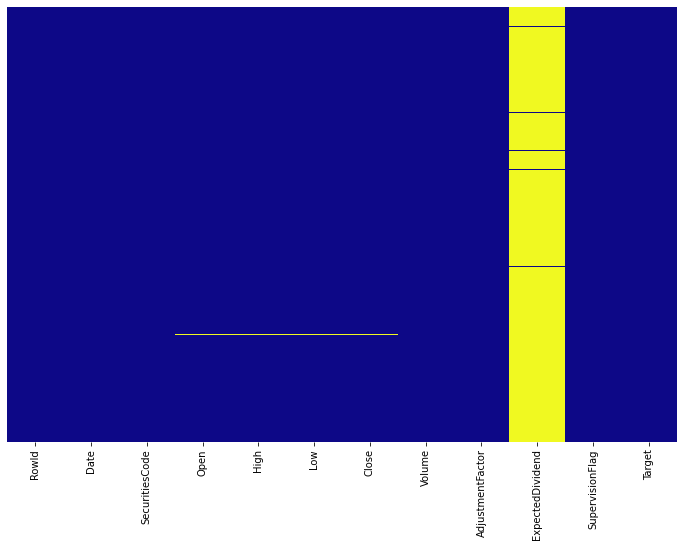

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(prices.isna(), cbar=False, cmap="plasma",yticklabels=False)
plt.show()

In [36]:
prices.SecuritiesCode.nunique()

2000

In [37]:
prices_nan = prices.query('Open != Open')
prices_nan

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
401,20170104_3540,2017-01-04,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
1753,20170104_9539,2017-01-04,9539,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.004149
2266,20170105_3540,2017-01-05,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
2511,20170105_4621,2017-01-05,4621,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
4131,20170106_3540,2017-01-06,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2330563,20211203_1787,2021-12-03,1787,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.030351
2330786,20211203_2761,2021-12-03,2761,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
2331453,20211203_5918,2021-12-03,5918,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.015625
2332336,20211203_9083,2021-12-03,9083,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.009615


In [38]:
prices_nan.SecuritiesCode.nunique()

1992

In [39]:
prices_nan.Date.nunique()

1175

In [40]:
prices_nan.Date.value_counts()

2020-10-01    1988
2017-03-16      15
2019-10-09      14
2019-04-04      14
2021-10-29      13
              ... 
2017-12-25       1
2017-12-26       1
2020-03-13       1
2018-01-04       1
2018-02-21       1
Name: Date, Length: 1175, dtype: int64

In [41]:
prices_nan[(prices_nan['Date']!='2020-10-01')].Date.value_counts().sort_values(ascending=True)

2017-11-02     1
2017-10-05     1
2019-12-06     1
2021-05-10     1
2017-10-03     1
              ..
2017-01-20    12
2021-10-29    13
2019-10-09    14
2019-04-04    14
2017-03-16    15
Name: Date, Length: 1174, dtype: int64

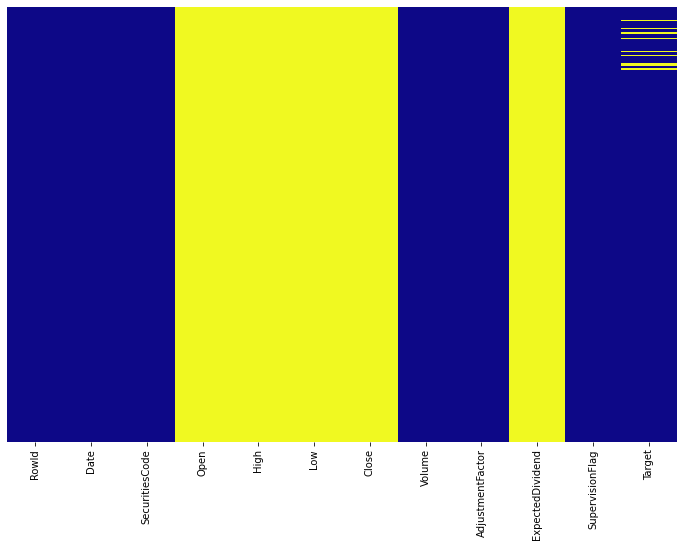

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(prices_nan.isna(), cbar=False, cmap="plasma",yticklabels=False)
plt.show()

In [43]:
trades = pd.read_csv('data/train_files/trades.csv')

In [44]:
trades.shape

(1712, 56)

- forward fill for 1-10-2020
- / consecutive missing values of trades can be removed. the stock was taken out
- forward fill for missing values

In [45]:
prices_wo_nan = prices.query('Date != "2020-10-01" and Open == Open')


In [46]:
prices.shape

(2332531, 12)

In [47]:
prices_wo_nan.shape

(2324923, 12)

In [48]:
prices_wo_nan.isnull().sum().sort_values(ascending=False)

ExpectedDividend    2306082
RowId                     0
Date                      0
SecuritiesCode            0
Open                      0
High                      0
Low                       0
Close                     0
Volume                    0
AdjustmentFactor          0
SupervisionFlag           0
Target                    0
dtype: int64

### Target
Change ratio of adjusted closing price between t+2 and t+1 where t+0 is TradeDate <br>
r(k,t) = C(k, t+2) - C(k, t+1) / C(k, t+1)


(-0.4, 0.4)

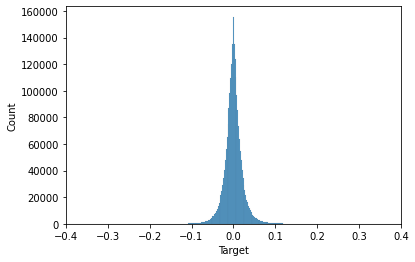

In [61]:
sns.histplot(prices.Target, bins=800, )
plt.xlim([-0.4, 0.4])

target for a stock

In [66]:
def plot_target(df, Code):
    single_stock = df.query('SecuritiesCode==@Code')
    plt.figure(figsize=(20,5))
    sns.lineplot(data=single_stock, y='Close', x='Date')
    ax2 = plt.twinx()
    sns.lineplot(data=single_stock, y='Target', x='Date', color='red')  

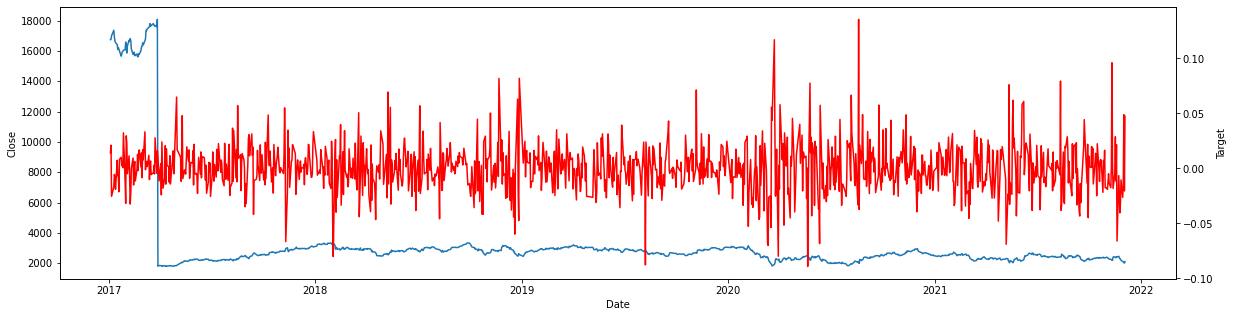

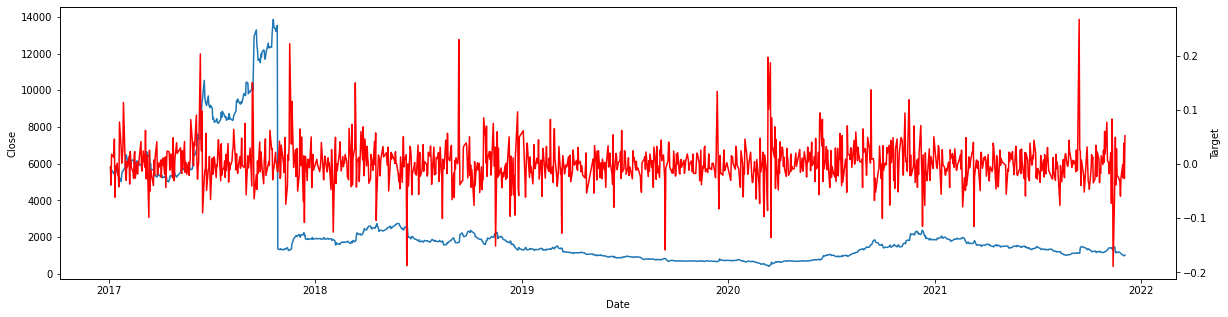

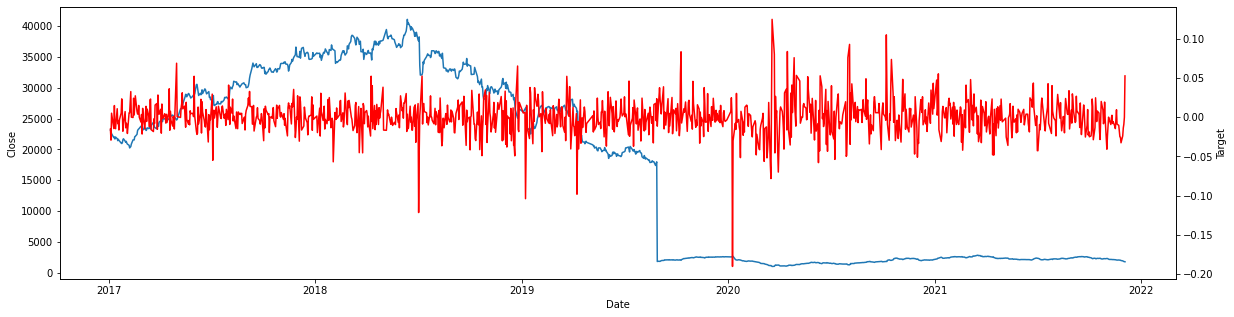

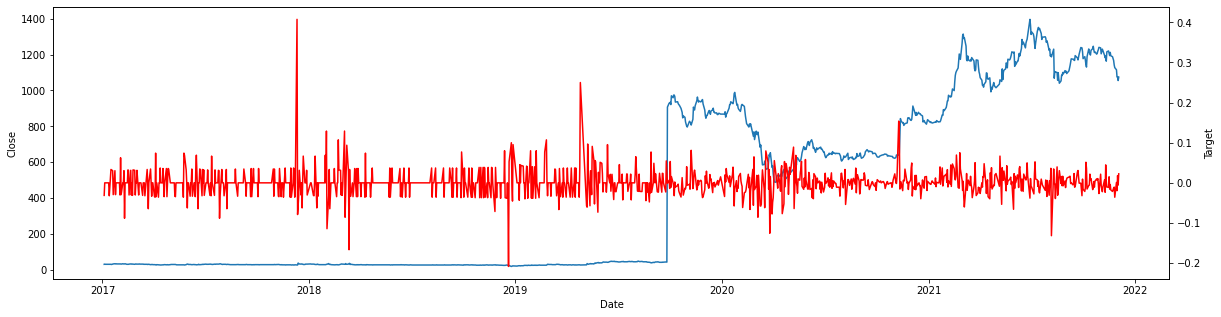

In [67]:
for i in [8876, 6630, 7453, 7638]:
    plot_target(prices, i)

In [60]:
S1332 = prices[prices['SecuritiesCode']==1]

RowId               87990
Date                87990
SecuritiesCode      87990
Open                85849
High                85849
Low                 85849
Close               85849
Volume              87990
AdjustmentFactor    87990
ExpectedDividend      456
SupervisionFlag     87990
Target              87990
dtype: int64

# Features engineering

## 1 fill nan values 

## 2 Adjusted prices
to calculate theoretical price/volume when split/reverse-split happens (NOT including dividend/allotment of shares/)

In [50]:
prices.AdjustmentFactor.unique()

array([ 1.        ,  0.5       ,  5.        ,  0.33333333,  0.83333333,
        0.25      ,  0.90909091,  0.1       , 10.        ,  0.2       ,
        0.95238095,  2.        ,  0.14285714,  0.66666667,  0.86956522,
        0.76923077,  0.8       ,  4.        , 20.        ])

- amount of stocks for each adjustment factor

In [51]:

for i in sorted(prices.AdjustmentFactor.unique()):
    print( 'adjustment factor = {}   \t:  {} trades'.format(
        round(i,2), prices[(prices['AdjustmentFactor']==i)].Date.count()
    ))
   

adjustment factor = 0.1   	:  3 trades
adjustment factor = 0.14   	:  1 trades
adjustment factor = 0.2   	:  20 trades
adjustment factor = 0.25   	:  33 trades
adjustment factor = 0.33   	:  59 trades
adjustment factor = 0.5   	:  328 trades
adjustment factor = 0.67   	:  4 trades
adjustment factor = 0.77   	:  6 trades
adjustment factor = 0.8   	:  2 trades
adjustment factor = 0.83   	:  6 trades
adjustment factor = 0.87   	:  1 trades
adjustment factor = 0.91   	:  10 trades
adjustment factor = 0.95   	:  3 trades
adjustment factor = 1.0   	:  2331801 trades
adjustment factor = 2.0   	:  36 trades
adjustment factor = 4.0   	:  1 trades
adjustment factor = 5.0   	:  113 trades
adjustment factor = 10.0   	:  103 trades
adjustment factor = 20.0   	:  1 trades


In [52]:
def adjust_price(df):
    # cumulative adjustment factor considering the day shift
    df.loc[:,'CAF'] = df['AdjustmentFactor'].cumprod().shift(1)
    # fill nan values
    df.CAF.fillna(1, inplace=True)
    # prices to be adjusted
    prices =[ 'Open', 'High', 'Low', 'Close']

    for x in prices:
        df.loc[:,'ad_' + str(x)]  = df[x] / df['CAF']
    
    # adjust volume
    df['ad_Volume'] = df['Volume'] * df['CAF']
    df.drop('CAF', axis=1, inplace=True)

    return df

In [53]:
# create an empty new DataFrame
adjusted_data = pd.DataFrame(columns = prices.columns)

for i in tqdm([8876, 6630, 7453, 7638]): #tqdm(prices.SecuritiesCode.unique()):
    df = prices.query('SecuritiesCode ==@i')
    adjusted_df = adjust_price(df)
    adjusted_data = pd.concat([adjusted_data, adjusted_df ], axis=0)

100%|██████████| 4/4 [00:00<00:00, 19.37it/s]


In [54]:
def plot_stock(df, Code):
    single_stock = df.query('SecuritiesCode==@Code')
    plt.figure(figsize=(20,5))
    sns.lineplot(data=single_stock, y='Close', x='Date')
    ax2 = plt.twinx()
    sns.lineplot(data=single_stock, y='ad_Close', x='Date', color='red')


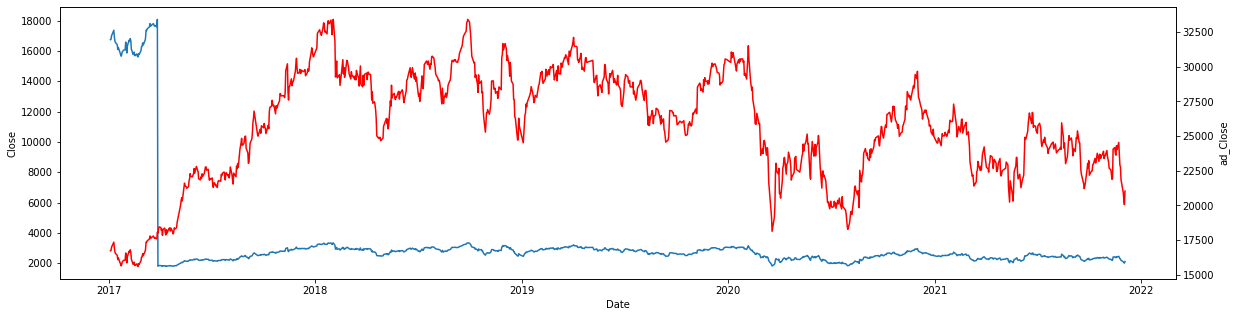

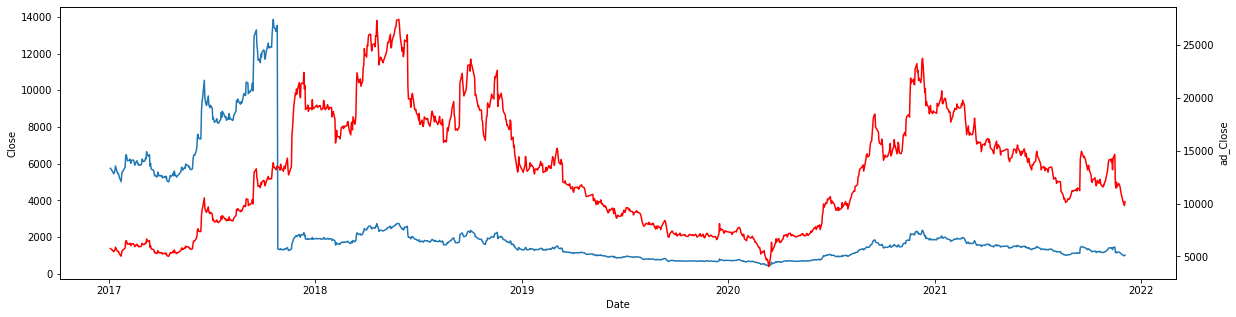

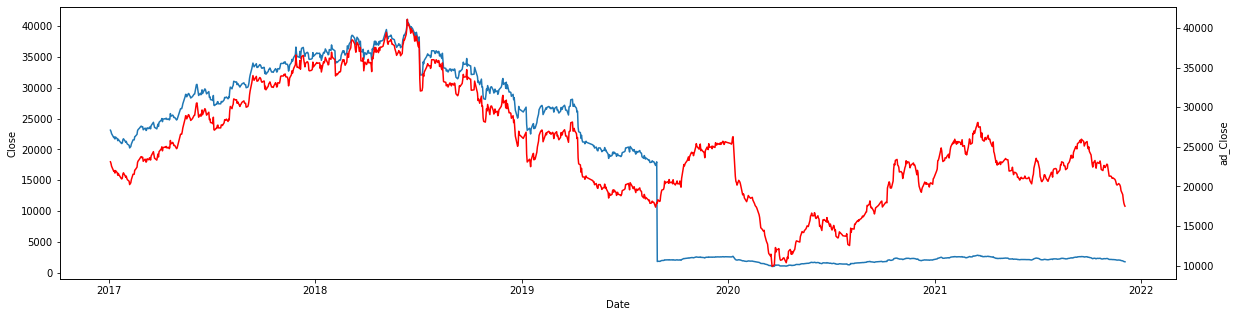

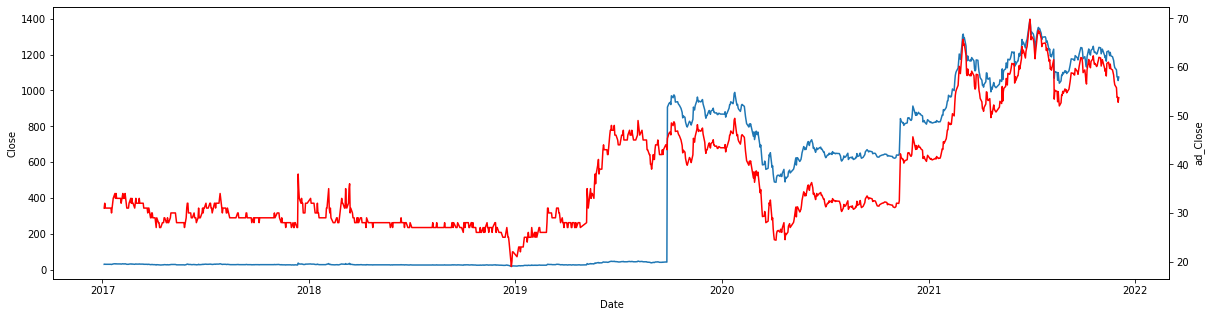

In [55]:
for i in [8876, 6630, 7453, 7638]:
    plot_stock(adjusted_data, i)

the adjusted value was calculated with process_adjusted_price.py and save in : data/train_files/stock_prices_ad.csv